# Tutorial: LIF Neuron Part I

**Week 0, Day 1: Python Workshop 1**

**By Neuromatch Academy**

---
# Tutorial objectives

This tutorial and the next are to help get up to speed on Python before the course.

In this notebook, we'll practice basic operations with Python variables, control flow, plotting, and take a sneak peek at `np.array`.

Each new concept in Python will unlock a different aspect of our implementation of a **Leaky Integrate-and-Fire (LIF)** neuron. We'll visualize the evolution of its membrane potential in time, and extract its statistical properties!


In [22]:
#imports 
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# @title Figure settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
%config InlineBackend.figure_format = 'retina'

## The LIF Model

\begin{align}
\tau_m\,\frac{d}{dt}\,V(t) &= E_{L} - V(t) + R\,I(t) &\text{if }\quad V(t) \leq V_{th} \\ \\
V(t) &= V_{reset}
\end{align}

### Coding Exercise 1: Defining parameters

In [24]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


### Coding Exercise 2: Simulating an input current 
![synaptic input](https://github.com/mpbrigham/colaboratory-figures/raw/master/nma/python-for-nma/synaptic_input.png)

\begin{equation}
I(t)=I_{mean}\left(1+\sin\left(\frac{2 \pi}{0.01}\,t\right)\right)
\end{equation}

where $I_{mean}$ is the mean current input and $t$ is the time.

In [25]:
# Loop for 10 steps, variable 'step' takes values from 0 to 9
for step in range(10):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin(2 * np.pi / 0.01 * t))

  # Print value of i
  print(i)

2.5e-10
3.969463130731183e-10
4.877641290737885e-10
4.877641290737885e-10
3.9694631307311837e-10
2.5000000000000007e-10
1.0305368692688166e-10
1.2235870926211617e-11
1.223587092621159e-11
1.0305368692688186e-10


### Coding Exercise 3: Printing pretty numbers

Repeat the loop from the previous exercise and print the t values with three decimal points, and synaptic input I(t) with four decimal points in exponential notation.

In [26]:
# Initialize step_end
step_end = 10

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Print value of t and i
  print(f'{t:.3f} {i:.4e}')

0.000 2.5000e-10
0.001 3.9695e-10
0.002 4.8776e-10
0.003 4.8776e-10
0.004 3.9695e-10
0.005 2.5000e-10
0.006 1.0305e-10
0.007 1.2236e-11
0.008 1.2236e-11
0.009 1.0305e-10


### Coding Exercise 4: Simulating membrane potential
\begin{equation}
V(t + \Delta t) =  V(t) + \frac{\Delta t}{\tau_m}\left( E_L -V(t) + R I(t) \right)
\end{equation}

In [34]:
# Initialize step_end and v0
step_end = 10
v = el

# Loop for step_end steps
for step in range(step_end):
  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v = v + dt/tau * (el - v + r * i)

  # Print value of t and v
  print(f'{t:.3f} {v:.4e}')

0.000 -5.8750e-02
0.001 -5.6828e-02
0.002 -5.4548e-02
0.003 -5.2381e-02
0.004 -5.0778e-02
0.005 -4.9989e-02
0.006 -4.9974e-02
0.007 -5.0414e-02
0.008 -5.0832e-02
0.009 -5.0775e-02


## Coding Exercise 5: Plotting current
Plot the values of $I(t)$ between $t=0$ and $t=0.024$

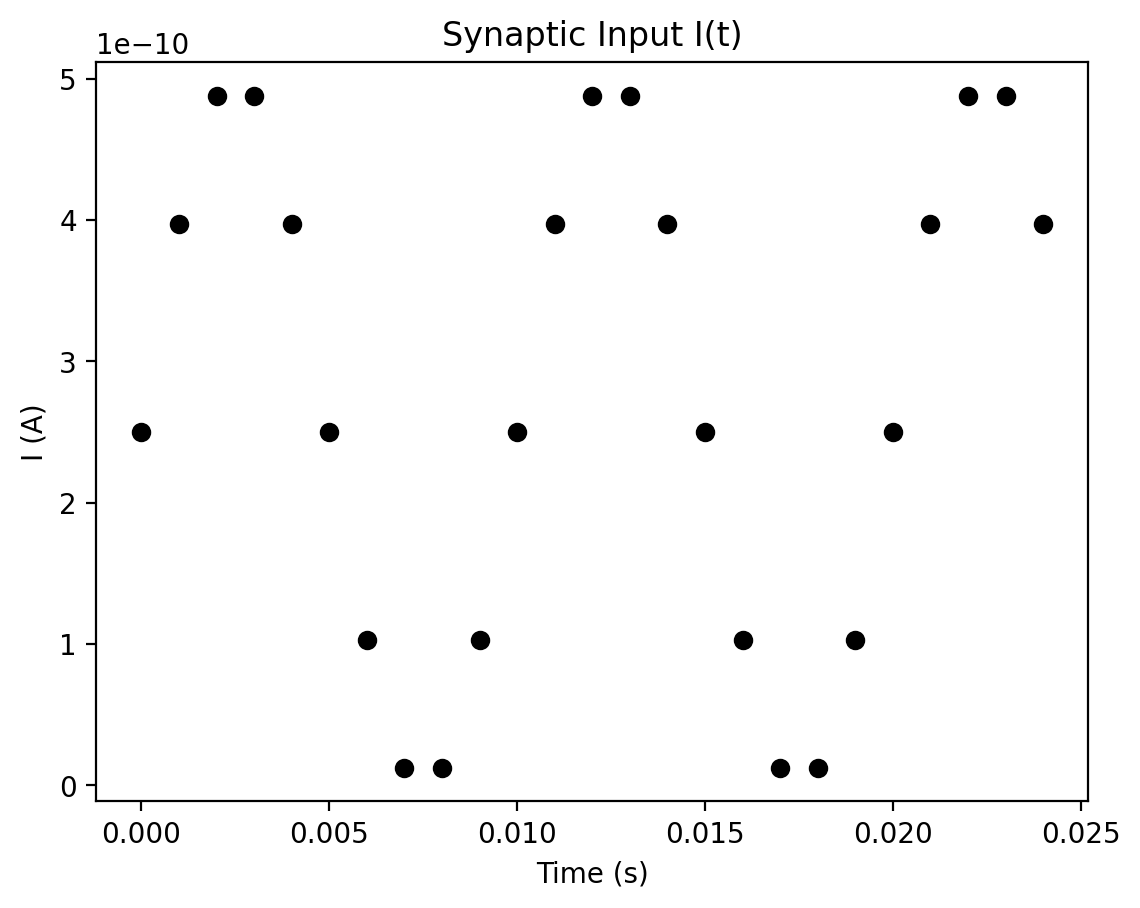

In [36]:
# Initialize step_end
step_end = 25

# Initialize the figure
plt.figure()
plt.title('Synaptic Input I(t)')
plt.xlabel('Time (s)')
plt.ylabel('I (A)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Plot i (use 'ko' to get small black dots (short for color='k' and marker = 'o'))
  plt.plot(t, i, 'ko')

# Display the plot
plt.show()

## Coding Exercise 6: Plotting membrane potential

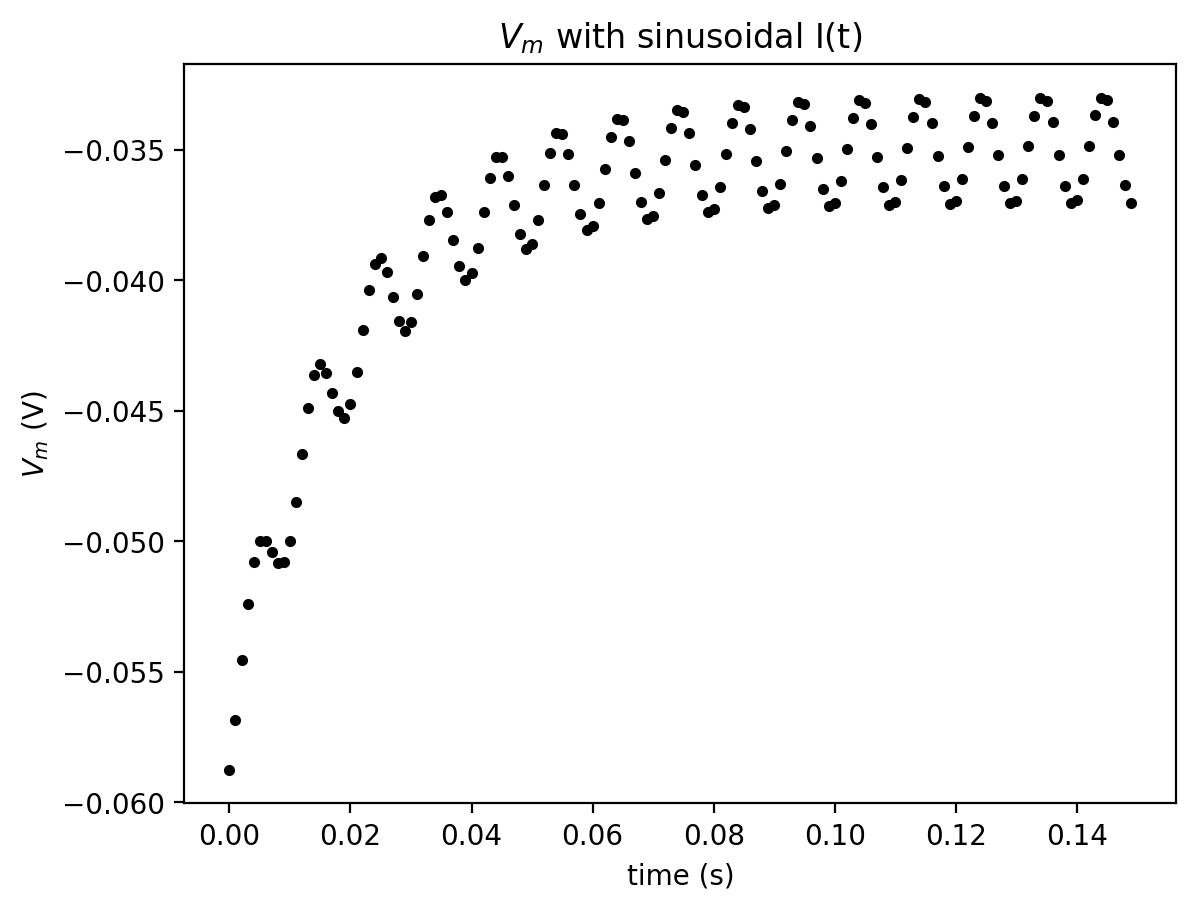

In [37]:
# Initialize step_end
step_end = int(t_max / dt)

# Initialize v0
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)');

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t, v, 'k.')

# Display plot
plt.show()

## Coding Exercise 7: Adding randomness to synaptic input

\begin{equation}
I(t) = I_{mean}\left(1+0.1\sqrt{\frac{t_{max}}{\Delta t}}\,\xi(t)\right)\qquad\text{with }\xi(t)\sim \mathcal{U}(-1,1)
\end{equation}

where $\mathcal{U}(-1,1)$ is the uniform distribution with support $x\in[-1,1]$.

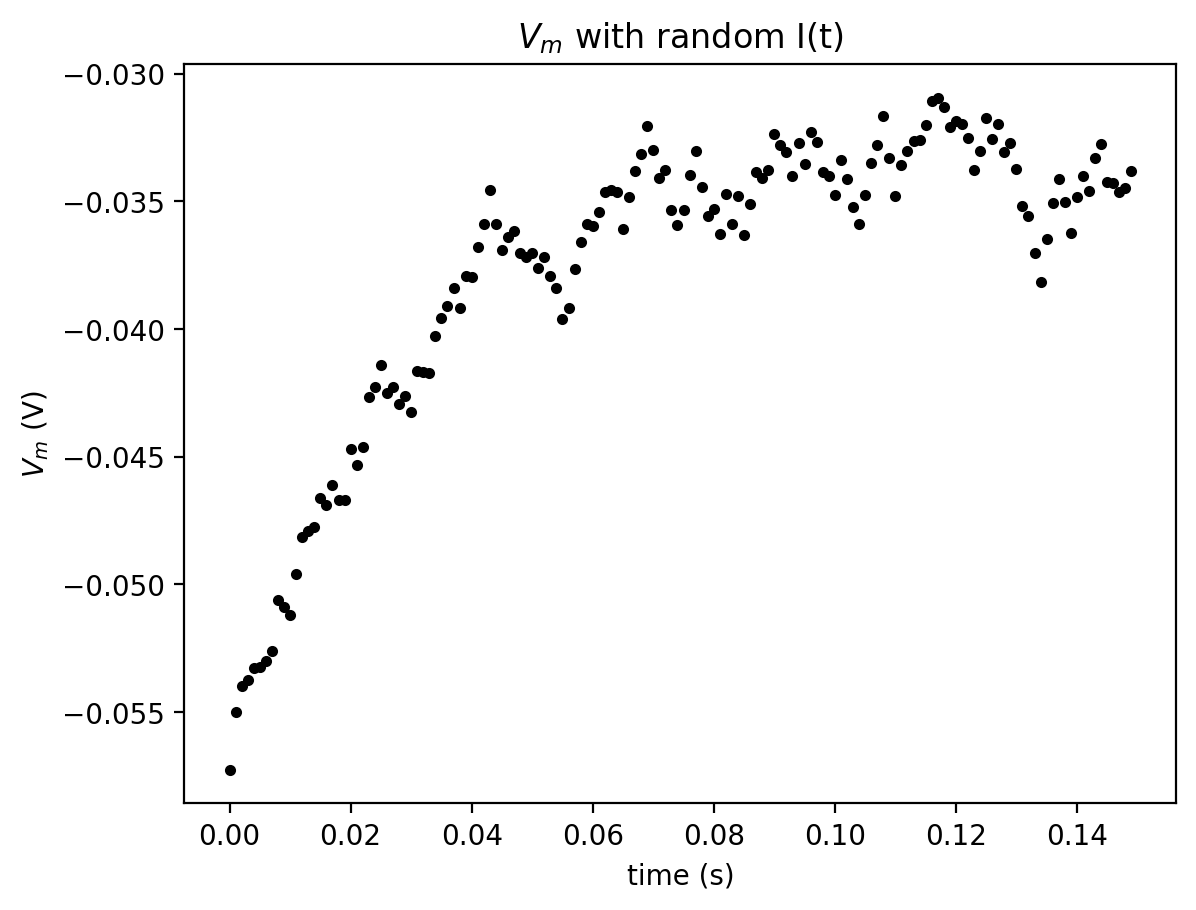

In [45]:
# Set random number generator (if desired)
# np.random.seed(2020)

# Initialize step_end and v
step_end = int(t_max / dt)
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Get random number in correct range of -1 to 1 (will need to adjust output of np.random.random)
  random_num = 2 * np.random.random() - 1

  # Compute value of i at this time step
  i = i_mean * (1 + 0.1 * (t_max/dt)**.5 * random_num)

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t, v, 'k.')


# Display plot
plt.show()

The sample mean, sample variance and sample autocovariance at times $\left\{t, s\right\}\in[0,t_{max}]$, and for $N$ realizations $V_n(t)$ are given by:

\begin{align}
\\
\left\langle V(t)\right\rangle &= \frac{1}{N}\sum_{n=1}^N V_n(t) & & \text{sample mean}\\
\left\langle (V(t)-\left\langle V(t)\right\rangle)^2\right\rangle &= \frac{1}{N-1} \sum_{n=1}^N \left(V_n(t)-\left\langle V(t)\right\rangle\right)^2 & & \text{sample variance} \\
\left\langle \left(V(t)-\left\langle V(t)\right\rangle\right)\left(V(s)-\left\langle V(s)\right\rangle\right)\right\rangle
&= \frac{1}{N-1} \sum_{n=1}^N \left(V_n(t)-\left\langle V(t)\right\rangle\right)\left(V_n(s)-\left\langle V(s)\right\rangle\right) & & \text{sample autocovariance}
\end{align}

## Coding Exercise 8: Storing simulations in lists
Plot multiple simulations ($N=50$) of $V(t)$ by storing in a list the voltage of each neuron at time $t$.

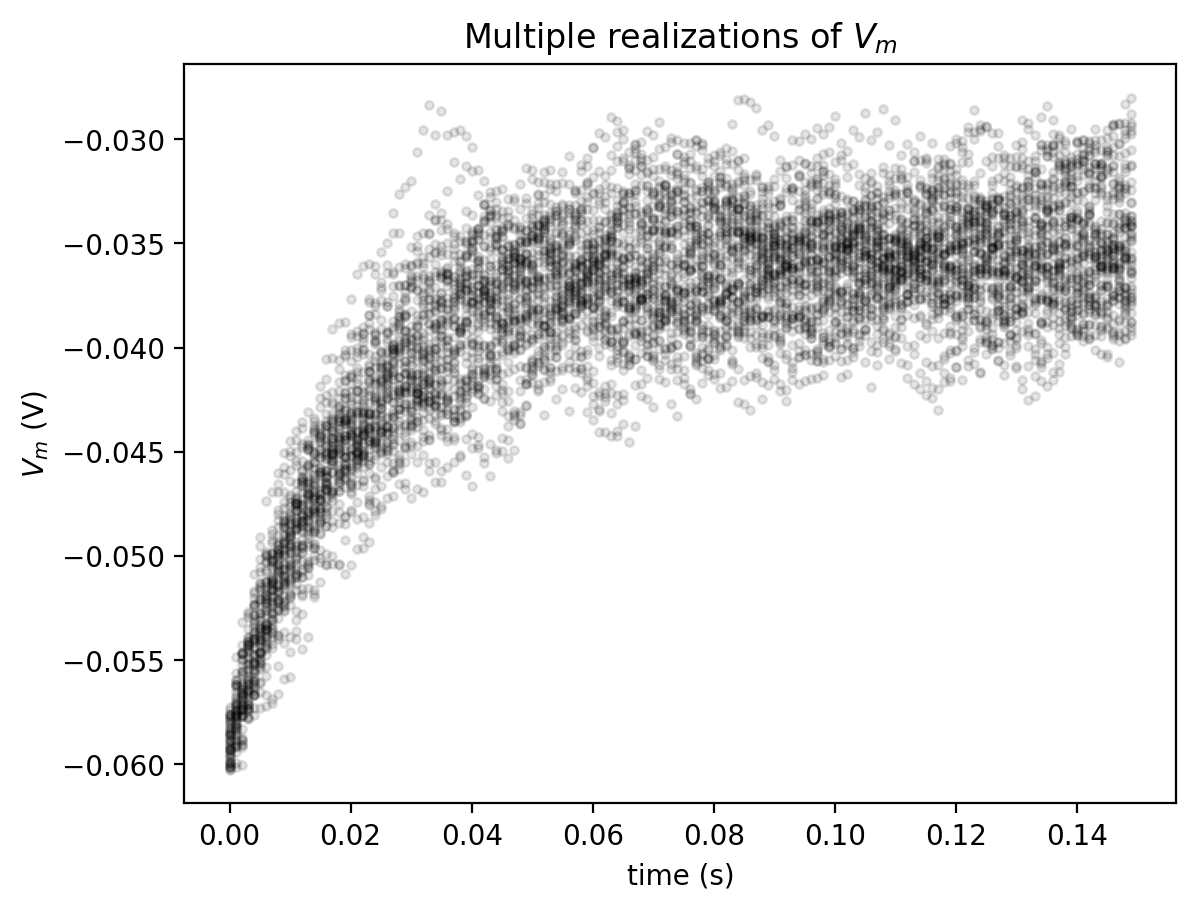

In [70]:
# Set random number generator (if desired)
# np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * 50

# Initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# Loop for step_end steps
for step in range(step_end):

    # Compute value of t
    t = step * dt

    # Loop for n simulations
    for j in range(0, n):

      # Compute value of i at this time step
      i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

      # Compute value of v for this simulation
      v_n[j] = v_n[j] + dt/tau * (el - v_n[j] + r * i)

    # Plot all simulations (use alpha = 0.1 to make each marker slightly transparent)
    plt.plot([t] * n, v_n, 'k.', alpha=0.1)

# Display plot
plt.show()

## Coding Exercise 9: Plotting sample mean

Add the sample mean $\left\langle V(t)\right\rangle=\frac{1}{N}\sum_{n=1}^N V_n(t)$ to the plot.

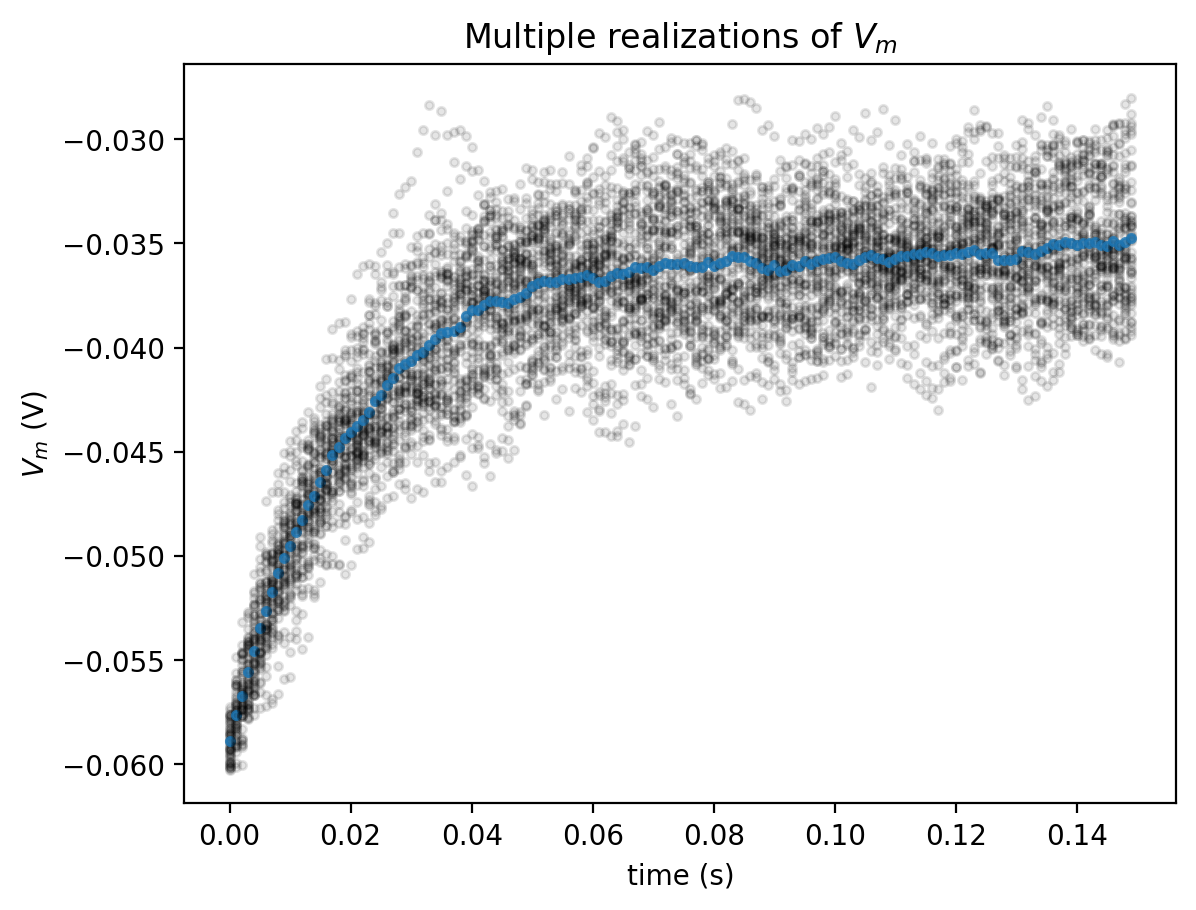

In [74]:
# Set random number generator (if desired)
# np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n

# Initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Loop for n simulations
  for j in range(0, n):

    # Compute value of i at this time step
    i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

    # Compute value of v for this simulation
    v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)

  # Compute sample mean by summing list of v_n using sum, and dividing by n
  v_mean = sum(v_n) / n

  # Plot simulations
  plt.plot(n*[t], v_n, 'k.', alpha=0.1)

  # Plot sample mean using alpha=0.8 and'C0.' for blue
  plt.plot(t, v_mean, 'C0.', alpha=0.8)

# Display plot
plt.show()

## Coding Exercise 10: Plotting sample standard deviation

Add the sample standard deviation $\sigma(t)\equiv\sqrt{\text{Var}\left(t\right)}$ to the plot, with sample variance $\text{Var}(t) = \frac{1}{N-1} \sum_{n=1}^N \left(V_n(t)-\left\langle V(t)\right\rangle\right)^2$.

Use a list comprehension to collect the sample variance `v_var`. 

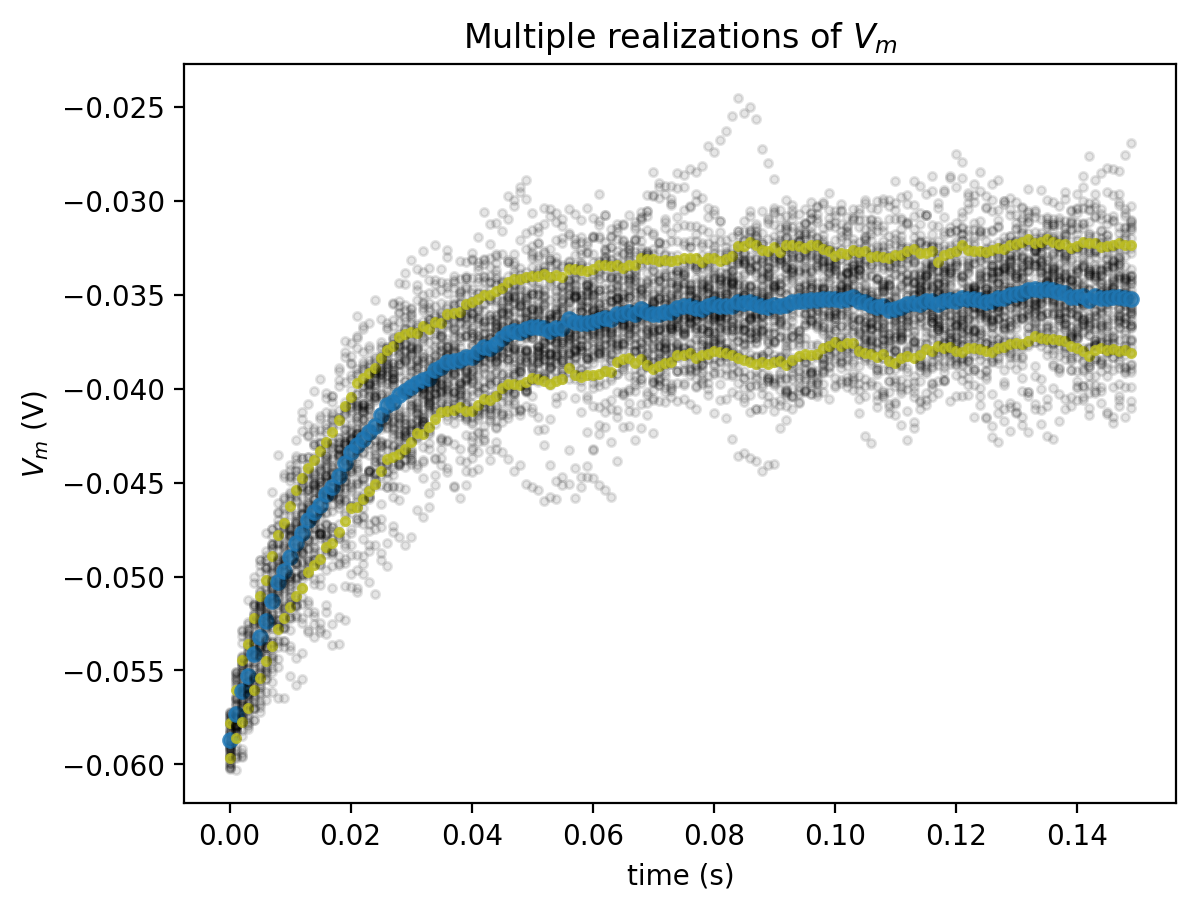

In [138]:
# Set random number generator (if desired)
# np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n

# Initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Loop for n simulations
  for j in range(0, n):

    # Compute value of i at this time step
    i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

    # Compute value of v for this simulation
    v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)

  # Compute sample mean
  v_mean = sum(v_n) / n

  # Initialize a list `v_var_n` with the contribution of each V_n(t) to
  # Var(t) with a list comprehension over values of v_n
  v_var_n = [(v - v_mean)**2 for v in v_n]

  # Compute sample variance v_var by summing the values of v_var_n with sum and dividing by n-1
  v_var = sum(v_var_n) / (n - 1)

  # Compute the standard deviation v_std with the function np.sqrt
  v_std = np.sqrt(v_var)

  # Plot simulations
  plt.plot(n*[t], v_n, 'k.', alpha=0.1)

  # Plot sample mean using alpha=0.8 and'C0.' for blue
  plt.plot(t, v_mean, 'C0.', alpha=0.8, markersize=10)

  # Plot mean + standard deviation with alpha=0.8 and argument 'C7.'
  plt.plot(t, v_mean + v_std, 'C8.', alpha=0.8)

  # Plot mean - standard deviation with alpha=0.8 and argument 'C7.'
  plt.plot(t, v_mean - v_std, 'C8.', alpha=0.8)


# Display plot
plt.show()

## Coding Exercise 11: Rewriting with NumPy

Rewrite the single neuron plot with random input from _Exercise 7_ with numpy arrays.

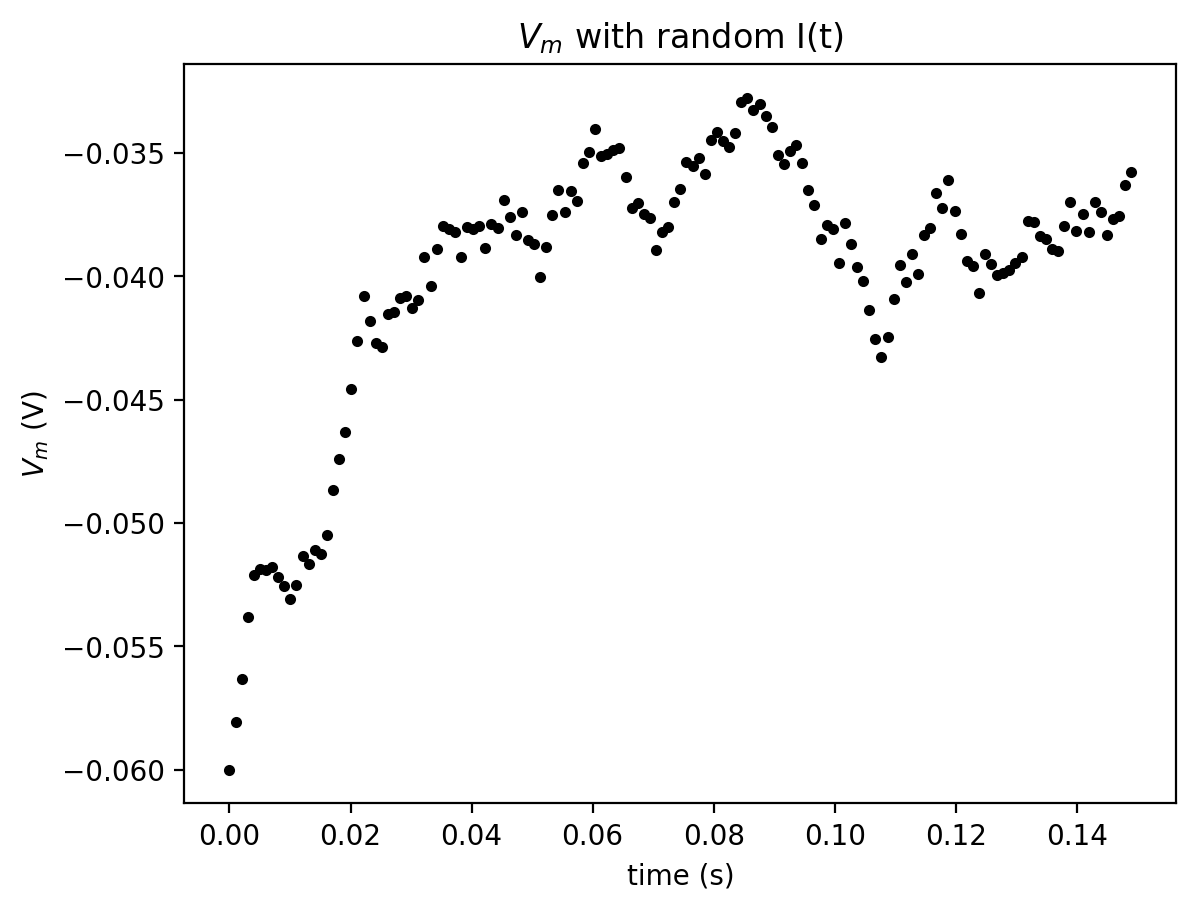

In [104]:
# Set random number generator (if desired)
# np.random.seed(2020)

# Initialize step_end, t_range, v
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

# Simulate current over time
i = i_mean * (1 + 0.1 * (t_max/dt)**.5 * ( 2 * np.random.random(size=step_end) - 1))

# Loop for step_end steps
for step in range(1, step_end):

  # Compute v as function of i
  v[step] = v[step-1] + dt/tau * (el - v[step-1] + r * i[step])


# Plot membrane potential
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k.')
plt.show()

## Coding Exercise 12: Using enumerate & indexing
Let's practice using `enumerate` to iterate over the indexes and values of the synaptic current array `i`. We want to get the step and the value of i at that step `i_step`

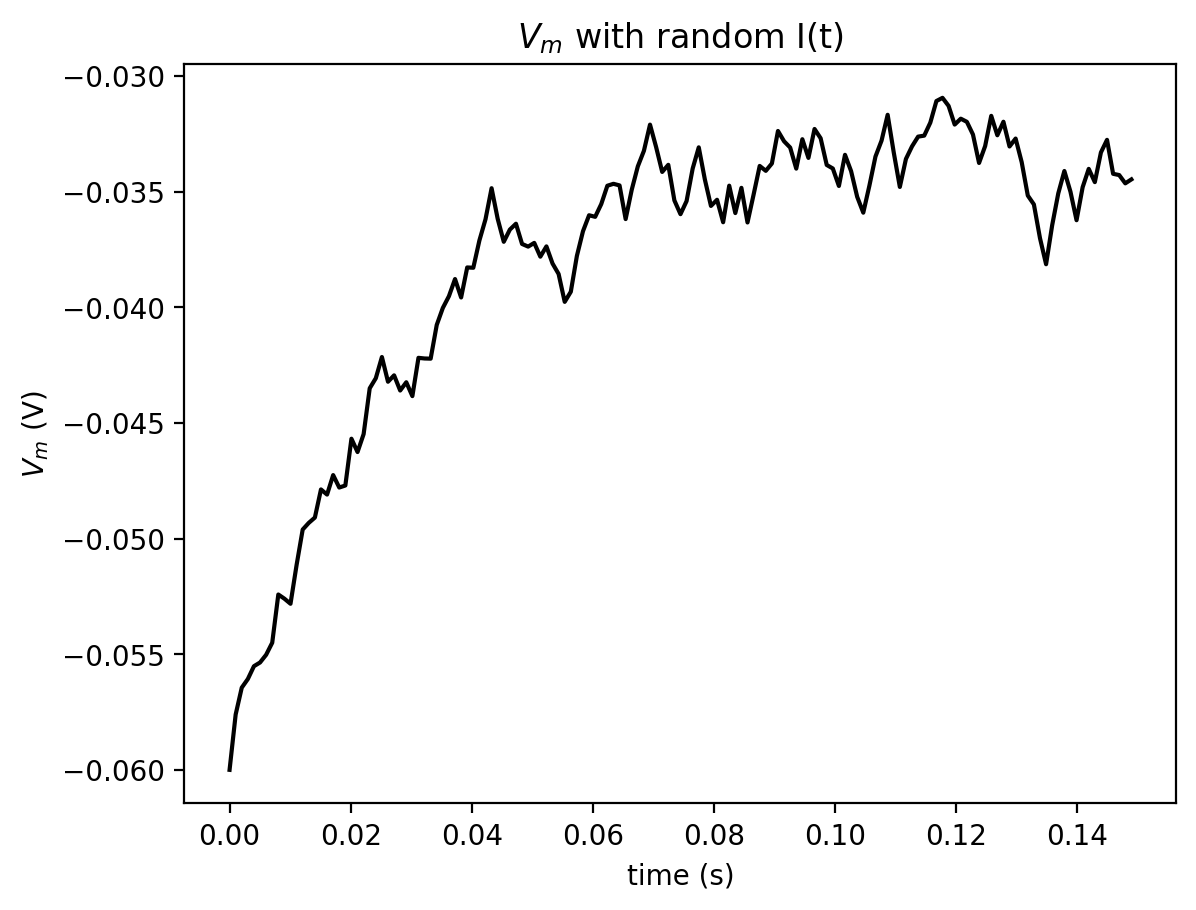

In [106]:
# Set random number generator (if desired)
# np.random.seed(2020)

# Initialize step_end, t_range, v
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

# Simulate current over time
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random(step_end) - 1))

# Loop for step_end values of i using enumerate
for step, i_step in enumerate(i):

  # Skip first iteration
  if step==0:
    continue

  # Compute v as function of i using i_step
  v[step] = v[step - 1] + dt/tau * (el - v[step - 1] + r * i[step])

# Plot figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k')
plt.show()

## Coding Exercise 13: Using 2D arrays

Plot multiple realizations ($N=50$) of $V(t)$ by storing the voltage of each neuron at time $t$ in a numpy array.

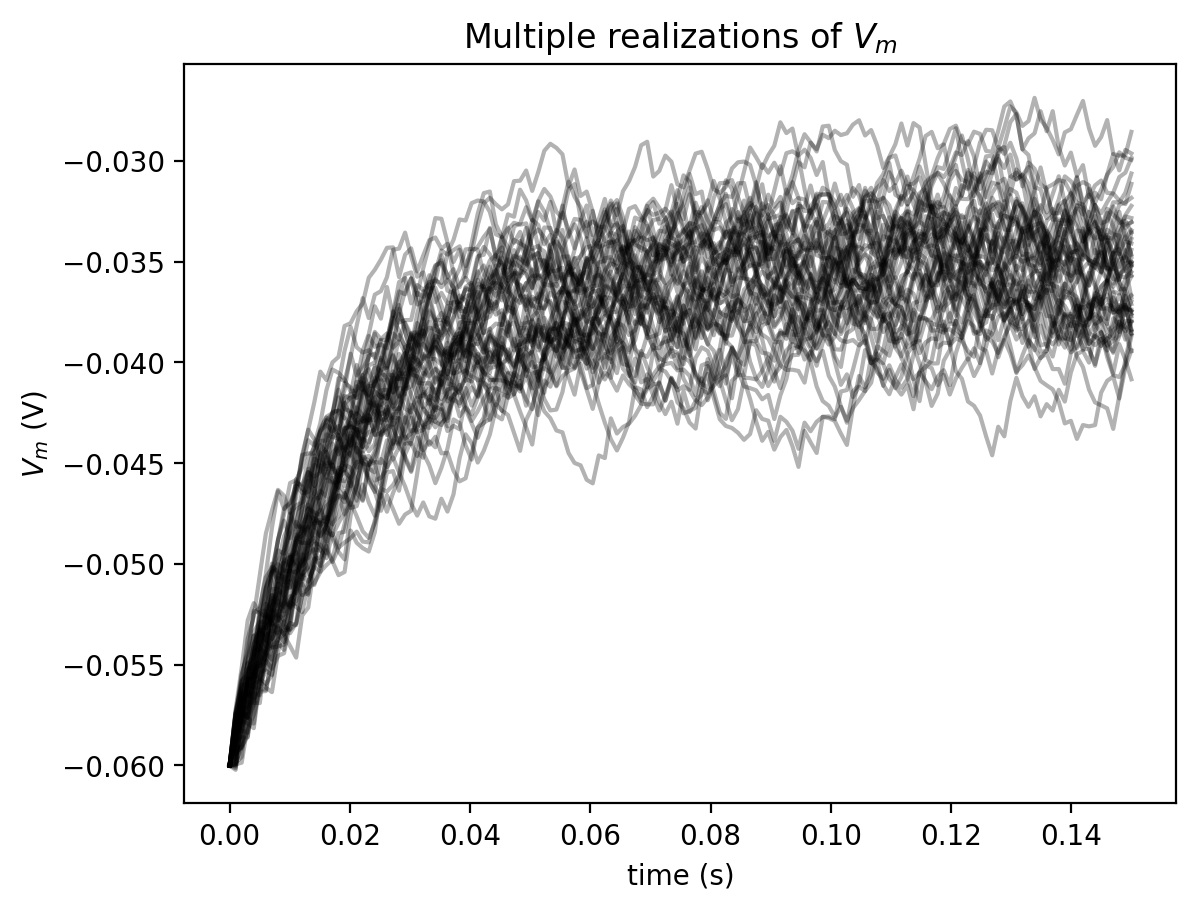

In [137]:
# Set random number generator (if desired)
# np.random.seed(2020)

# Initialize step_end, n, t_range, v and i
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max/dt)**0.5 * (2 * np.random.random([n, step_end]) - 1))

# Loop for step_end - 1 steps
for step in range(1, step_end):

   # Compute v_n
   v_n[:, step] = v_n[:, step - 1] + (dt/tau) * (el - v_n[:, step - 1] + r * i[:, step])

# Plot figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v_n.T, 'k', alpha=0.3)
plt.show()

## Coding Exercise 14: Plotting sample mean and standard deviation

Add sample mean $\left\langle V(t)\right\rangle$ and standard deviation $\sigma(t)\equiv\sqrt{\text{Var}\left(t\right)}$ to the plot.

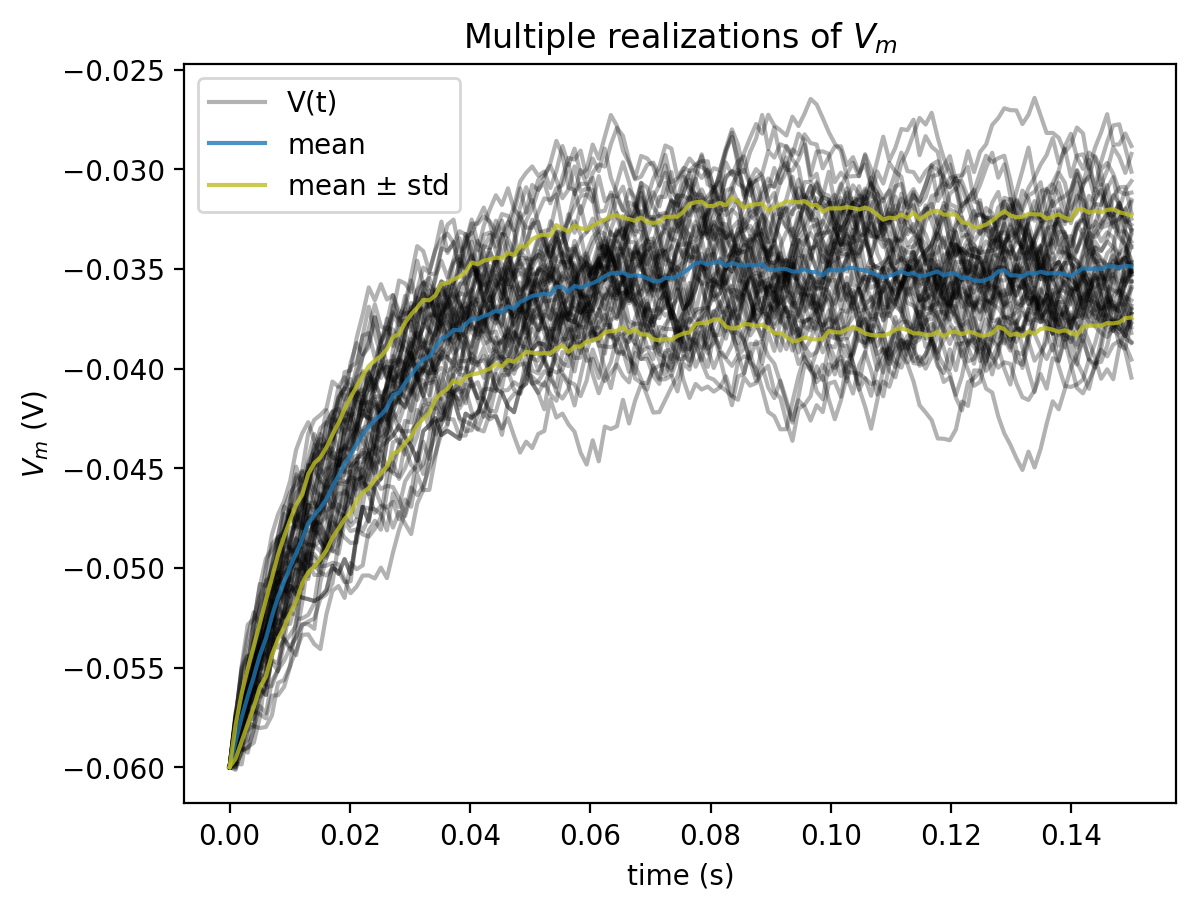

In [136]:
# Set random number generator (if desired)
# np.random.seed(2020)

# Initialize step_end, n, t_range, v and i
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Loop for step_end - 1 steps
for step in range(1, step_end):

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])

# Compute sample mean (use np.mean)
v_mean = np.mean(v_n, axis=0)

# Compute sample standard deviation (use np.std)
v_std = np.std(v_n, axis=0)

# Plot figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v_n.T, 'k', alpha=0.3)

plt.plot(t_range, v_n[-1], 'k', alpha=0.3, label='V(t)')
plt.plot(t_range, v_mean, 'C0', alpha=0.8, label='mean')
plt.plot(t_range, v_mean+v_std, 'C8', alpha=0.8)
plt.plot(t_range, v_mean-v_std, 'C8', alpha=0.8, label='mean $\\pm$ std')

plt.legend()
plt.show()